In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]



small_index = np.array(np.where(meta[:,1]<1000)[0])
small_meta = meta[small_index,:]
large_index = np.array(np.where(meta[:,1]>5000)[0])
large_meta = meta[large_index,:]

balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
bal_meta = meta[balance_index,:]
inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])
inb_meta = meta[inbalance_index,:]

In [3]:
[len(bin_index),len(multi_index),len(small_index),len(large_index),len(inbalance_index),len(balance_index)]

[91, 75, 95, 26, 24, 137]

In [4]:
bv3 = np.load("outbv3.npy")
bv4 = np.load("outbv4.npy")
bv5 = np.load("outbv5.npy")
bv6 = np.load("outbv6.npy")
bv7 = np.load("outbv7.npy")

In [5]:
bv6.shape
# 4d (array +array + array+ array)
### pc 1 st suppose 9 but currently 2
### pc 2nd 166 datasets
### pc 3rd options for each par
### pc 4th 6 stats



(9, 166, 3, 6)

In [6]:
c1 = np.repeat(0.6,9)
c2 = np.repeat([0.1,0.15,0.2],3)
c3 = np.tile([0.1,0.15,0.2],3)
size_set = np.column_stack((c1,c2,c3))
numsize = size_set.shape[0]
size_set

array([[0.6 , 0.1 , 0.1 ],
       [0.6 , 0.1 , 0.15],
       [0.6 , 0.1 , 0.2 ],
       [0.6 , 0.15, 0.1 ],
       [0.6 , 0.15, 0.15],
       [0.6 , 0.15, 0.2 ],
       [0.6 , 0.2 , 0.1 ],
       [0.6 , 0.2 , 0.15],
       [0.6 , 0.2 , 0.2 ]])

In [7]:
standard = bv6[4]

In [8]:
standard.shape

(166, 3, 6)

In [9]:
standard_o = []
standard_d = []
standard_r = []

In [10]:
for i in range(0,166):
    standard_o.append(standard[i][0])
    standard_d.append(standard[i][1])
    standard_r.append(standard[i][2])
np_standard_o = np.array(standard_o)
np_standard_d = np.array(standard_d)
np_standard_r = np.array(standard_r)

In [11]:
pd_standard_o = pd.DataFrame(np_standard_o,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_d = pd.DataFrame(np_standard_d,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_r = pd.DataFrame(np_standard_r,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_o.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.187242,0.192595,0.008044,0.003219,0.261850,0.046619
std,0.174600,0.130921,0.033727,0.007279,0.172084,0.040322
min,0.000000,0.007735,0.000000,0.000000,0.007955,0.000496
25%,0.045762,0.079006,0.000000,0.000000,0.103960,0.016858
50%,0.137682,0.185109,0.000000,0.000000,0.238276,0.036439
75%,0.274479,0.281969,0.001067,0.001755,0.394961,0.063339
max,1.000000,0.610250,0.244688,0.034434,0.815583,0.222881


In [12]:
pd_standard_d.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.192384,0.192458,0.008044,0.003219,0.261902,0.046765
std,0.179463,0.131262,0.033727,0.007279,0.172357,0.040724
min,0.000000,0.007722,0.000000,0.000000,0.007934,0.000499
25%,0.047619,0.080060,0.000000,0.000000,0.104750,0.016777
50%,0.146819,0.179996,0.000000,0.000000,0.238127,0.036752
75%,0.288782,0.282687,0.001067,0.001755,0.388030,0.063408
max,1.000000,0.608333,0.244688,0.034434,0.818167,0.246868


In [13]:
pd_standard_r.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.193046,0.194520,0.007875,0.003232,0.263601,0.046917
std,0.179379,0.132667,0.033304,0.007310,0.173040,0.040834
min,0.000000,0.007768,0.000000,0.000000,0.007973,0.000491
25%,0.047619,0.079569,0.000000,0.000000,0.104094,0.016960
50%,0.144782,0.186452,0.000000,0.000000,0.243054,0.035449
75%,0.289857,0.286755,0.000904,0.001798,0.389552,0.062498
max,1.000000,0.614000,0.243246,0.034599,0.818083,0.220690


(array([68., 31., 33., 13., 13.,  3.,  2.,  1.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

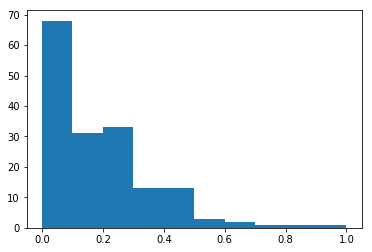

In [14]:
plt.hist(pd_standard_o["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

(array([70., 27., 31., 17., 13.,  3.,  1.,  2.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

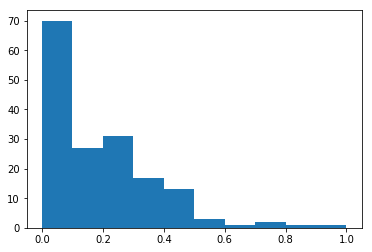

In [15]:
plt.hist(pd_standard_d["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

(array([69., 28., 28., 19., 14.,  3.,  2.,  1.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

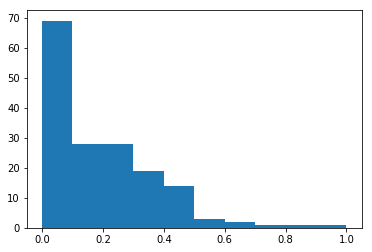

In [16]:
plt.hist(pd_standard_r["bias"],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Standard set

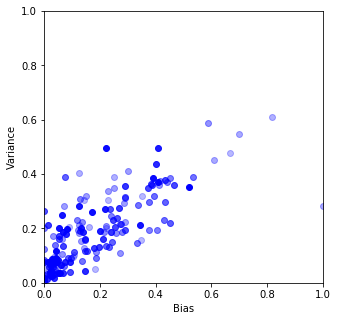

In [17]:
bias = np_standard_o[:,0]
var = np_standard_o[:,1]
train_err = np_standard_o[:,2]
train_std = np_standard_o[:,3]
test_err = np_standard_o[:,4]
test_std = np_standard_o[:,5]


##rankdata is larger if the stat is larger
alpha = 0.25+0.75*stats.rankdata(meta[:,2])/166
# alpha = 0.5+0.5*(meta[:,2] - min(meta[:,2]))/(max(meta[:,2]) - min(meta[:,2]))/166
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
for i in range(0,166):
    ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig("pic1.1.1.jpg")
plt.show()
#plt.scatter(bias,var,alpha=0.6)


In [18]:
stats.rankdata(meta[:,2])

array([166. , 105.5, 105.5, 105.5, 105.5, 105.5, 158.5, 158.5,  87. ,
       116. , 125.5, 125.5, 125.5, 125.5,  13.5,   6.5, 154. ,  28.5,
         6.5,   6.5,  28.5,  67. ,  67. ,  13.5,  73. ,  19.5,   6.5,
        55.5,  13.5, 112. ,  38. ,  87. , 121.5, 131.5,  13.5,   1.5,
        45. ,  67. ,  55.5, 129.5,  55.5,  90. ,  28.5, 131.5,  28.5,
       112. ,  45. ,  38. , 137. , 105.5, 160.5, 160.5,  81. ,  81. ,
        38. ,  38. ,  55.5, 156. , 116. , 119. ,   6.5, 142. ,  55.5,
        28.5,  90. , 105.5,  90. , 133.5,  45. , 125.5, 162. ,  38. ,
       125.5, 143. ,  67. , 105.5,  55.5,  55.5,   6.5,  13.5,  81. ,
        81. ,  81. ,  99.5, 116. ,  94. ,  81. , 121.5, 133.5,  13.5,
        19.5, 141. , 137. ,  28.5,  94. , 120. ,  38. ,  94. ,  28.5,
         6.5,  97.5,  67. , 163. , 155. , 152.5,  28.5, 164. , 146. ,
       165. ,  67. , 148.5,  28.5,  28.5,  28.5, 157. , 116. ,  28.5,
        19.5,  45. , 152.5,  67. ,  19.5,  67. ,  94. ,  19.5,  45. ,
        67. ,  45. ,

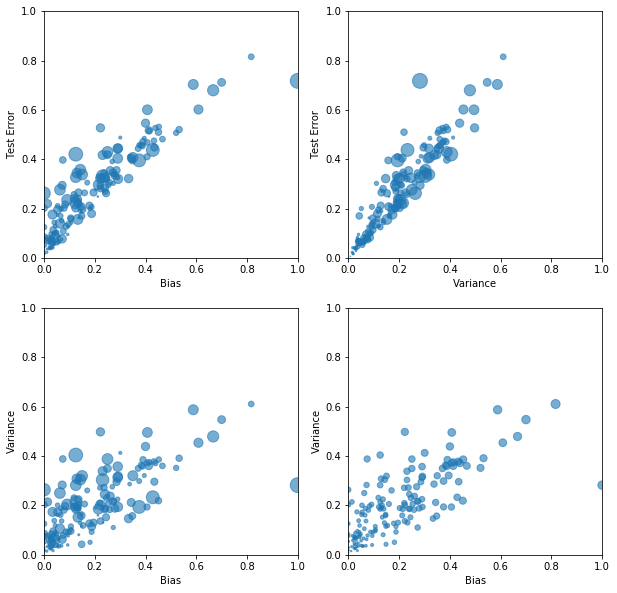

In [19]:
fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)

plt.savefig("pic1.1.2.jpg")
plt.show()

# Binary set

In [20]:
np_standard_o = np.array(standard_o)

In [21]:
np_bin_standard_o = np_standard_o[bin_index,:]
np_bin_standard_o.shape

(91, 6)

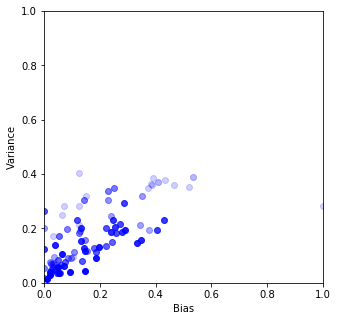

In [22]:
bias = np_bin_standard_o[:,0]
var = np_bin_standard_o[:,1]
train_err = np_bin_standard_o[:,2]
train_std = np_bin_standard_o[:,3]
test_err = np_bin_standard_o[:,4]
test_std = np_bin_standard_o[:,5]

alpha = 0.1 + 0.9*stats.rankdata(bin_meta[:,5])/91
fig = plt.figure(figsize = (5,5))
ax1 = plt.subplot(111)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,91):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
plt.savefig("pic1.2.1.jpg")

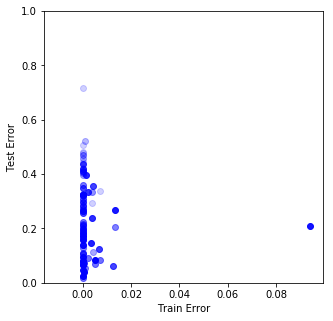

In [23]:
fig = plt.figure(figsize = (5,5))
ax2 = plt.subplot(111)
plt.xlabel("Train Error")
plt.ylabel("Test Error")
plt.ylim([0,1])
for i in range(0,91):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")
plt.savefig("pic1.2.2.jpg")    
plt.show()


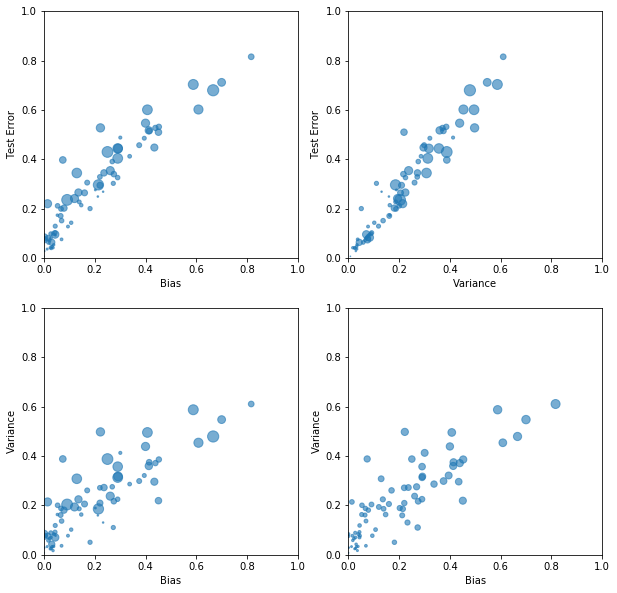

In [41]:

    


fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.5.jpg")
plt.show()

In [25]:
pd.DataFrame(bin_meta[:,5]).describe()

,0
count,91.000000
mean,0.122071
std,0.195859
min,0.000000
25%,0.001528
50%,0.051795
75%,0.129728
max,0.939440


# Multi set

In [26]:
np_multi_standard_o = np_standard_o[multi_index,:]
np_multi_standard_o.shape

(75, 6)

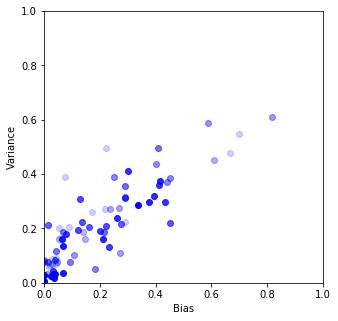

In [38]:
bias = np_multi_standard_o[:,0]
var = np_multi_standard_o[:,1]
train_err = np_multi_standard_o[:,2]
train_std = np_multi_standard_o[:,3]
test_err = np_multi_standard_o[:,4]
test_std = np_multi_standard_o[:,5]

alpha = 0.1 + 0.9*stats.rankdata(multi_meta[:,5])/75
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(0,75):
    ax1.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")

plt.savefig("pic1.2.3.jpg")

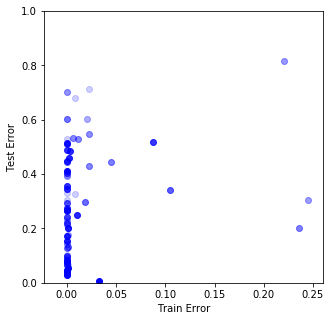

In [39]:
fig = plt.figure(figsize=(5,5))    
ax2 = plt.subplot(111)
plt.xlabel("Train Error")
plt.ylabel("Test Error")
plt.ylim([0,1])
for i in range(0,75):
    ax2.scatter(train_err[i],test_err[i],alpha = alpha[i],c = "blue")
plt.savefig("pic1.2.4.jpg")    
plt.show()

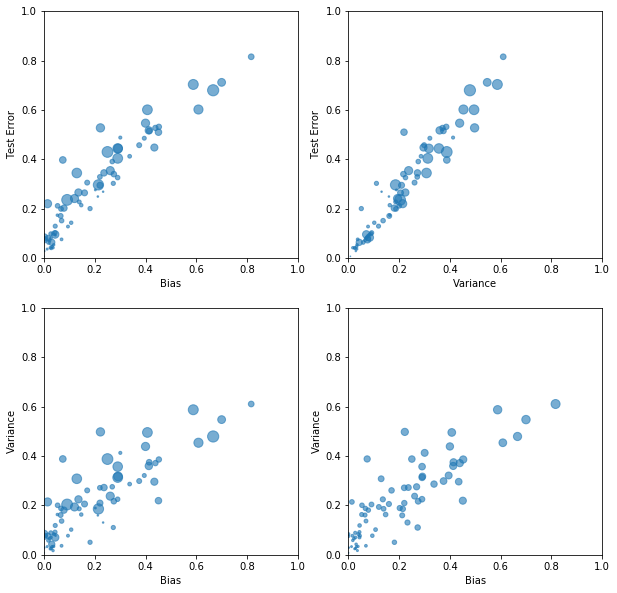

In [40]:

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.6.jpg")
plt.show()

# Balance set

In [28]:
np_bal_standard_o = np_standard_o[balance_index,:]
np_bal_standard_o.shape

(137, 6)

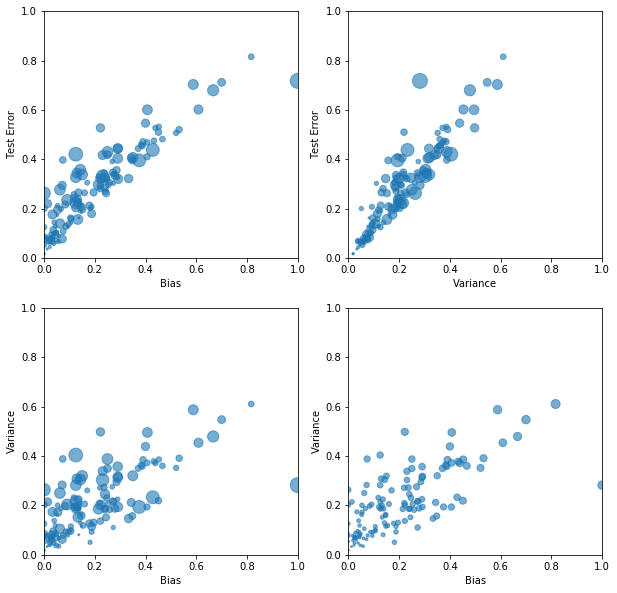

In [42]:
bias = np_bal_standard_o[:,0]
var = np_bal_standard_o[:,1]
train_err = np_bal_standard_o[:,2]
train_std = np_bal_standard_o[:,3]
test_err = np_bal_standard_o[:,4]
test_std = np_bal_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(bal_meta[:,4])/137
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,137):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.7.jpg")
plt.show()

# Inbalance set

In [30]:
np_inb_standard_o = np_standard_o[inbalance_index,:]
np_inb_standard_o.shape

(24, 6)

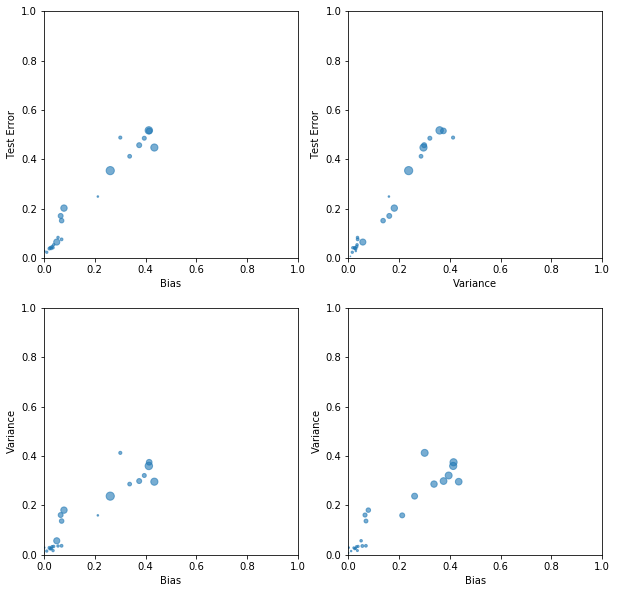

In [43]:
bias = np_inb_standard_o[:,0]
var = np_inb_standard_o[:,1]
train_err = np_inb_standard_o[:,2]
train_std = np_inb_standard_o[:,3]
test_err = np_inb_standard_o[:,4]
test_std = np_inb_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(inb_meta[:,4])/24
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,24):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
plt.xlabel("Bias")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
plt.xlabel("Variance")
plt.ylabel("Test Error")
plt.xlim([0,1])
plt.ylim([0,1])
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
plt.xlabel("Bias")
plt.ylabel("Variance")
plt.xlim([0,1])
plt.ylim([0,1])
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.8.jpg")
plt.show()

# Large set

In [32]:
np_large_standard_o = np_standard_o[large_index,:]
np_large_standard_o.shape

(26, 6)

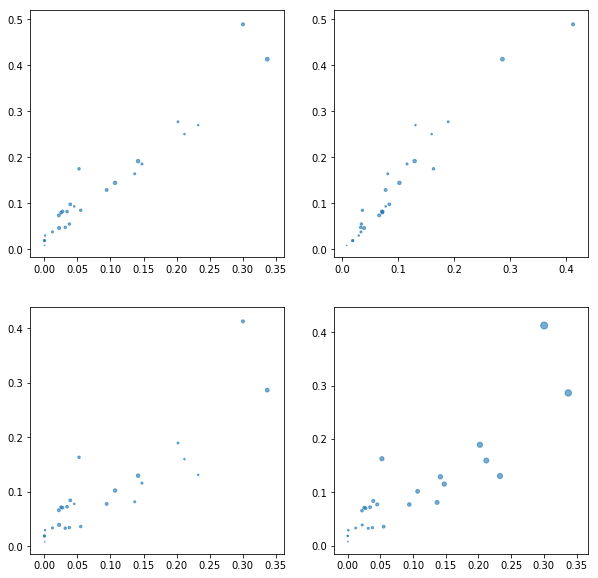

In [45]:
bias = np_large_standard_o[:,0]
var = np_large_standard_o[:,1]
train_err = np_large_standard_o[:,2]
train_std = np_large_standard_o[:,3]
test_err = np_large_standard_o[:,4]
test_std = np_large_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(large_meta[:,4])/26
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,26):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.10.jpg")
plt.show()

# Small set

In [34]:
np_small_standard_o = np_standard_o[small_index,:]
np_small_standard_o.shape

(95, 6)

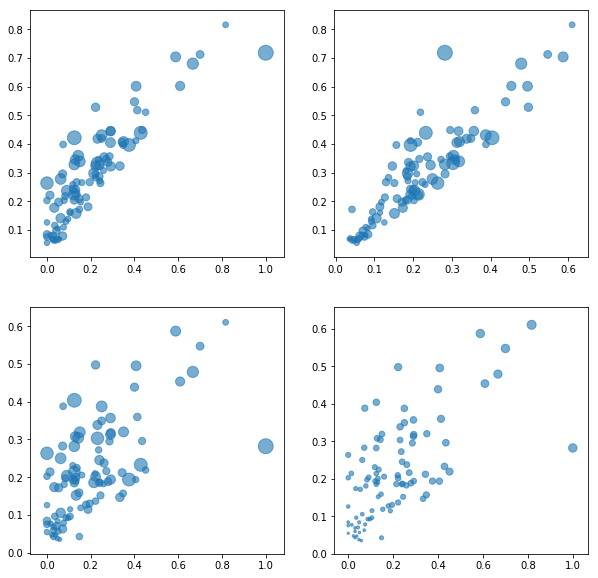

In [44]:
bias = np_small_standard_o[:,0]
var = np_small_standard_o[:,1]
train_err = np_small_standard_o[:,2]
train_std = np_small_standard_o[:,3]
test_err = np_small_standard_o[:,4]
test_std = np_small_standard_o[:,5]

# alpha = 0.1 + 0.9*stats.rankdata(small_meta[:,4])/95
# fig = plt.figure()
# ax = plt.subplot()
# for i in range(0,95):
#     ax.scatter(bias[i],var[i],alpha = alpha[i],c = "blue")
    
# plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot()
ax1 = plt.subplot(221)
ax1.scatter(bias,test_err,s=test_std*1000,alpha=0.6)
ax2 = plt.subplot(222)
ax2.scatter(var,test_err,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(223)
ax3.scatter(bias,var,s=test_std*1000,alpha=0.6)
ax3 = plt.subplot(224)
ax3.scatter(bias,var,s=test_err*100,alpha=0.6)
#when bias & variance goes large, the standard err of loss estimation will get larger
plt.savefig("pic1.2.9.jpg")
plt.show()